In [ ]:
import sys
!{sys.executable} -m pip install seaborn

In [1]:
%matplotlib inline
#%seaborn inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sn

In [2]:
from pathlib import Path
# `path.parents[1]` is the same as `path.parent.parent`
d = Path().resolve().parents[1]
d

PosixPath('/home/hadoop/Git_Ia/CegepSteFoy_IA')

In [3]:
#path to data
dataPrefix = str(d)+"/04_Eda/Data/TP01/"
dataPrefix

#data file
## ce fichier a été créé à l'aide de sqlite
csvFile = "v_operFournisseurs.csv"

In [4]:
# lecture csv

donnee =pd.read_csv(dataPrefix+csvFile)
stats=donnee.describe()

stats

,PommesTraitesKg,TempsPressageHeure,EauLavage,PressionMaxPressagePsi,ProductionLitre,RendementLitrePerKg,CoutDollarPerLitre,Annees,PoidsNominalTonne,PctMcIntosh,PctSpartan,PctEmpire,PctCortland
count,574.000000,570.000000,289.000000,572.000000,570.000000,571.000000,571.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000
mean,31185.527875,3.992456,24.875433,1999.939336,7869.898246,0.257370,18.622189,2017.871080,31.184669,25.494425,25.436760,23.572822,25.508362
std,29535.975865,0.107517,2.879233,1.955040,9992.219479,0.177241,11.155532,3.130233,29.539645,39.374722,39.131873,40.896939,42.268470
min,9712.000000,3.700000,20.000000,1993.600000,471.000000,0.047000,3.380000,2012.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,10018.750000,3.900000,22.000000,1998.700000,2148.750000,0.107500,8.300000,2015.000000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,19941.500000,4.000000,25.000000,1999.900000,3966.000000,0.251000,12.610000,2018.000000,20.000000,1.250000,1.050000,0.000000,0.000000
75%,49850.750000,4.100000,27.000000,2001.300000,10526.250000,0.327000,29.415000,2021.000000,50.000000,19.050000,18.750000,56.850000,85.875000
max,100235.000000,4.400000,30.000000,2006.900000,59969.000000,0.720000,40.250000,2022.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [42]:
type(donnee)

pandas.core.frame.DataFrame

In [ ]:
dir(donnee)

In [5]:
# https://www.geeksforgeeks.org/count-nan-or-missing-values-in-pandas-dataframe/
##count total Nan at each column
donnee.isnull().sum()

LotNo                       0
PommesTraitesKg             0
TempsPressageHeure          4
EauLavage                 285
PressionMaxPressagePsi      2
EtatFermenteur              4
Produit                     0
ProductionLitre             4
RendementLitrePerKg         3
CoutDollarPerLitre          3
Couleur                     0
Intensite                   0
LotNo:1                     0
Fournisseur                 0
Annees                      0
PoidsNominalTonne           0
PctMcIntosh                 0
PctSpartan                  0
PctEmpire                   0
PctCortland                 0
dtype: int64

In [6]:
## 285/574 valeurs de la colonne EauLavage sont null
## on peut supprimer cette colonne
donnee=donnee.drop(labels = ['LotNo:1', 'EauLavage'], axis=1)

In [7]:
# https://www.geeksforgeeks.org/count-nan-or-missing-values-in-pandas-dataframe/
##count total Nan at each row
for i in(range(len(donnee.index))):
    countNull = donnee.iloc[i].isnull().sum()
    if (countNull >0):
        print("Total Nan in row ", i+1, ":", countNull)

Total Nan in row  4 : 1
Total Nan in row  6 : 1
Total Nan in row  50 : 1
Total Nan in row  84 : 1
Total Nan in row  94 : 1
Total Nan in row  140 : 1
Total Nan in row  244 : 1
Total Nan in row  266 : 1
Total Nan in row  295 : 1
Total Nan in row  329 : 1
Total Nan in row  334 : 1
Total Nan in row  362 : 1
Total Nan in row  367 : 1
Total Nan in row  372 : 1
Total Nan in row  391 : 1
Total Nan in row  395 : 1
Total Nan in row  421 : 2
Total Nan in row  430 : 1
Total Nan in row  546 : 1


In [9]:
## function to print rows containing nulls
def print_rows_null(pDf):
    print("only print rows containing at least one null field")
    for i in(range(len(pDf.index))):
        countNull = pDf.iloc[i].isnull().sum()
        if (countNull >0):
            print("Total Nan in row ", i+1, ":", countNull)

In [32]:
## https://stackoverflow.com/questions/34693079/python-pandas-dataframe-interpolate-missing-data
donnee_interpolate = donnee.interpolate(method='linear').ffill().bfill()
donnee_interpolate.isnull().sum()

LotNo                     0
PommesTraitesKg           0
TempsPressageHeure        0
PressionMaxPressagePsi    0
EtatFermenteur            0
Produit                   0
ProductionLitre           0
RendementLitrePerKg       0
CoutDollarPerLitre        0
Couleur                   0
Intensite                 0
Fournisseur               0
Annees                    0
PoidsNominalTonne         0
PctMcIntosh               0
PctSpartan                0
PctEmpire                 0
PctCortland               0
dtype: int64

In [63]:
print_rows_null(donnee_interpolate)

only print rows containing at least one null field


In [33]:
### Couleur et Intensite : transformer en numérique
donnee_interpolate.Couleur.unique()

array(['Très faible', 'Faible', 'Absente', 'Très forte', 'Forte',
       'Moyenne'], dtype=object)

In [11]:
### Couleur et Intensite : transformer en numérique
donnee_interpolate.Intensite.unique()

array(['Très forte', 'Forte', 'Moyenne', 'Faible', 'Très faible',
       'Absente'], dtype=object)

In [34]:
### Replace 'Absente' with Nan, then interpolate
donnee_interpolate = donnee_interpolate.replace('Absente', np.NaN)
donnee_interpolate = donnee_interpolate.interpolate(method='linear').ffill().bfill()

In [35]:
# check again nulls per column
donnee_interpolate.isnull().sum()

LotNo                     0
PommesTraitesKg           0
TempsPressageHeure        0
PressionMaxPressagePsi    0
EtatFermenteur            0
Produit                   0
ProductionLitre           0
RendementLitrePerKg       0
CoutDollarPerLitre        0
Couleur                   0
Intensite                 0
Fournisseur               0
Annees                    0
PoidsNominalTonne         0
PctMcIntosh               0
PctSpartan                0
PctEmpire                 0
PctCortland               0
dtype: int64

In [36]:
print_rows_null(donnee_interpolate)

only print rows containing at least one null field


In [15]:
###
# At this point, we have a dataframe with no nulls
###

In [37]:
### Couleur et Intensite : transformer en numérique
# https://medium.com/@haya.toumy/encoding-string-variables-in-python-and-dealing-with-null-values-93f8e48fe5c1
#dictCouleur = {'Très faible':0, 'Faible':1, 'Absente':np.Nan, 'Très forte':4, 'Forte':3,
       #'Moyenne':2}

    ## As Couleur et Intensite share the same values, we set just one dictionnary
dictCouluerIntensite = {'Très forte':4, 'Forte':3, 'Moyenne':2, 'Faible':1, 'Très faible':0,
       'Absente':np.NaN}

donnee_interpolate.Couleur.replace(dictCouluerIntensite, inplace=True)
donnee_interpolate.Intensite.replace(dictCouluerIntensite, inplace = True)

In [38]:
## check again unique values for Couleur et Intensite. Now with numeric values
donnee_interpolate.Couleur.unique()

array([0, 1, 4, 3, 2])

In [39]:
## check again unique values for Couleur et Intensite. Now with numeric values
donnee_interpolate.Intensite.unique()

array([4, 3, 2, 1, 0])

In [19]:
###
# At this point couleur and intensite are numeric
###

In [40]:
###
# Creating numeric columns
###

colsFournisseur = pd.get_dummies(donnee_interpolate['Fournisseur'])
colsProduit = pd.get_dummies(donnee_interpolate['Produit'])

## concatenate side by side
donnee_interpolate = pd.concat([donnee_interpolate, colsFournisseur, colsProduit], axis=1)

In [31]:
colsProduit.head()

,Cidre de glace,Cidre pétillant,Cidre tranquille
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [30]:
colsFournisseur.head()

,A,B,C,D,E,F,G,H
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [41]:
donnee_interpolate.head()

,LotNo,PommesTraitesKg,TempsPressageHeure,PressionMaxPressagePsi,EtatFermenteur,Produit,ProductionLitre,RendementLitrePerKg,CoutDollarPerLitre,Couleur,...,B,C,D,E,F,G,H,Cidre de glace,Cidre pétillant,Cidre tranquille
0,2012A1001,99995,3.9,2000.5,OK,Cidre tranquille,59969.0,0.600,4.04,0,...,0,0,0,0,0,0,0,0,0,1
1,2012A1005,99949,3.9,2000.1,OK,Cidre pétillant,28593.0,0.286,12.32,0,...,0,0,0,0,0,0,0,0,1,0
2,2012A1013,100043,4.0,1998.6,OK,Cidre pétillant,29433.0,0.294,11.93,1,...,0,0,0,0,0,0,0,0,1,0
3,2012A1018,99884,3.8,1995.9,OK,Cidre de glace,12198.0,0.205,26.86,0,...,0,0,0,0,0,0,0,1,0,0
4,2012A1026,100013,4.1,1996.4,OK,Cidre de glace,11620.0,0.116,27.39,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
### col EtatFermenteur
donnee_interpolate.EtatFermenteur.unique()

array(['OK'], dtype=object)

In [44]:
### Only 'OK', so replace by 1
donnee_interpolate.replace('OK', 1)

,LotNo,PommesTraitesKg,TempsPressageHeure,PressionMaxPressagePsi,EtatFermenteur,Produit,ProductionLitre,RendementLitrePerKg,CoutDollarPerLitre,Couleur,...,B,C,D,E,F,G,H,Cidre de glace,Cidre pétillant,Cidre tranquille
0,2012A1001,99995,3.9,2000.5,1,Cidre tranquille,59969.0,0.600,4.04,0,...,0,0,0,0,0,0,0,0,0,1
1,2012A1005,99949,3.9,2000.1,1,Cidre pétillant,28593.0,0.286,12.32,0,...,0,0,0,0,0,0,0,0,1,0
2,2012A1013,100043,4.0,1998.6,1,Cidre pétillant,29433.0,0.294,11.93,1,...,0,0,0,0,0,0,0,0,1,0
3,2012A1018,99884,3.8,1995.9,1,Cidre de glace,12198.0,0.205,26.86,0,...,0,0,0,0,0,0,0,1,0,0
4,2012A1026,100013,4.1,1996.4,1,Cidre de glace,11620.0,0.116,27.39,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,2022H1050,10178,3.9,2001.5,1,Cidre de glace,1308.0,0.129,28.86,4,...,0,0,0,0,0,0,1,1,0,0
570,2022H1058,9977,4.1,2002.5,1,Cidre de glace,1642.0,0.165,32.42,4,...,0,0,0,0,0,0,1,1,0,0
571,2022H1066,9855,4.1,1999.7,1,Cidre de glace,1165.0,0.118,33.51,4,...,0,0,0,0,0,0,1,1,0,0
572,2022H1074,10069,4.1,2002.0,1,Cidre de glace,1020.0,0.101,26.43,4,...,0,0,0,0,0,0,1,1,0,0


In [65]:
## Ading columns production and Profit
qa_tranquille = 500000 #kg/year
qa_petillant = 900000 #kg/year
qc_glace = 1100000 #kg/an

prix_tranquille=15 # $/l
prix_petillant = 25 # $/l
prix_glace = 65 # 65/l

## col_Production
colProduction =  (donnee_interpolate['Cidre tranquille']*donnee_interpolate['RendementLitrePerKg']*donnee_interpolate['A']*qa_tranquille)\
+ (donnee_interpolate['Cidre pétillant']*donnee_interpolate['RendementLitrePerKg']*donnee_interpolate['A']*qa_petillant)\
+ (donnee_interpolate['Cidre de glace']*donnee_interpolate['RendementLitrePerKg']*donnee_interpolate['C']*qc_glace)

## col_profit
# colProfit = (donnee_interpolate['Cidre tranquille']*donnee_interpolate['RendementLitrePerKg']*donnee_interpolate['A']*qa_tranquille*(prix_tranquille-))

In [66]:
colProduction

0      300000.0
1      257400.0
2      264600.0
3           0.0
4           0.0
         ...   
569         0.0
570         0.0
571         0.0
572         0.0
573         0.0
Length: 574, dtype: float64

In [64]:
(donnee_interpolate['Cidre tranquille']*donnee_interpolate['RendementLitrePerKg']*donnee_interpolate['A']*qa_tranquille)\
+ (donnee_interpolate['Cidre pétillant']*donnee_interpolate['RendementLitrePerKg']*donnee_interpolate['A']*qa_petillant)\
+ (donnee_interpolate['Cidre de glace']*donnee_interpolate['RendementLitrePerKg']*donnee_interpolate['C']*qc_glace)

0      300000.0
1      257400.0
2      264600.0
3           0.0
4           0.0
         ...   
569         0.0
570         0.0
571         0.0
572         0.0
573         0.0
Length: 574, dtype: float64

In [45]:
donnee_interpolate.dtypes

LotNo                      object
PommesTraitesKg             int64
TempsPressageHeure        float64
PressionMaxPressagePsi    float64
EtatFermenteur             object
Produit                    object
ProductionLitre           float64
RendementLitrePerKg       float64
CoutDollarPerLitre        float64
Couleur                     int64
Intensite                   int64
Fournisseur                object
Annees                      int64
PoidsNominalTonne           int64
PctMcIntosh               float64
PctSpartan                float64
PctEmpire                 float64
PctCortland               float64
A                           uint8
B                           uint8
C                           uint8
D                           uint8
E                           uint8
F                           uint8
G                           uint8
H                           uint8
Cidre de glace              uint8
Cidre pétillant             uint8
Cidre tranquille            uint8
dtype: object

In [20]:
## Do we have new nulls (cols)
donnee_interpolate.isnull().sum()

LotNo                     0
PommesTraitesKg           0
TempsPressageHeure        0
PressionMaxPressagePsi    0
EtatFermenteur            0
Produit                   0
ProductionLitre           0
RendementLitrePerKg       0
CoutDollarPerLitre        0
Couleur                   0
Intensite                 0
Fournisseur               0
Annees                    0
PoidsNominalTonne         0
PctMcIntosh               0
PctSpartan                0
PctEmpire                 0
PctCortland               0
dtype: int64

In [21]:
## Do we have new nulls (rows) ?
print_rows_null(donnee_interpolate)

only print rows containing at least one null field


In [ ]:
###
# At this point, we have a df with no
###

In [34]:
donnee_interpolate_2 = donnee_interpolate.interpolate(method='linear').ffill().bfill()
donnee_interpolate_2.Couleur.unique()

array([0.  , 1.  , 0.5 , 0.25, 0.75, 4.  , 3.  , 2.  ])

In [65]:
#export cleaned df to csv
donnee_interpolate.to_csv(dataPrefix+"out.csv");

In [19]:
pd.get_dummies(donnee_interpolate['Fournisseur'])

,A,B,C,D,E,F,G,H
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
569,0,0,0,0,0,0,0,1
570,0,0,0,0,0,0,0,1
571,0,0,0,0,0,0,0,1
572,0,0,0,0,0,0,0,1


In [12]:
## séance 3 - variables catégoriques, nominales
from sklearn.preprocessing import OneHotEncoder

In [15]:
oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(donnee_interpolate.Fournisseur)

ValueError: Expected 2D array, got 1D array instead:
array=['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D'
 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D'
 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D'
 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D'
 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E'
 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E'
 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E'
 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E'
 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'F' 'F' 'F' 'F' 'F' 'F' 'F'
 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F'
 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F'
 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F'
 'F' 'F' 'F' 'F' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G'
 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G'
 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G'
 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H'
 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H'
 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H'
 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [14]:
donnee_interpolate.Fournisseur

0      A
1      A
2      A
3      A
4      A
      ..
569    H
570    H
571    H
572    H
573    H
Name: Fournisseur, Length: 574, dtype: object

In [22]:
dimensions = donnee.shape
dimensions

(574, 20)

In [24]:
#Génération variables binnaires
X=pd.get_dummies(donnee)
X

,PommesTraitesKg,TempsPressageHeure,EauLavage,PressionMaxPressagePsi,ProductionLitre,RendementLitrePerKg,CoutDollarPerLitre,Annees,PoidsNominalTonne,PctMcIntosh,...,LotNo:1_2022H1074,LotNo:1_2022H1082,Fournisseur_A,Fournisseur_B,Fournisseur_C,Fournisseur_D,Fournisseur_E,Fournisseur_F,Fournisseur_G,Fournisseur_H
0,99995,3.9,NaN,2000.5,59969.0,0.600,4.04,2012,100,93.8,...,0,0,1,0,0,0,0,0,0,0
1,99949,3.9,20.0,2000.1,28593.0,0.286,12.32,2012,100,83.9,...,0,0,1,0,0,0,0,0,0,0
2,100043,4.0,28.0,1998.6,29433.0,0.294,11.93,2012,100,89.7,...,0,0,1,0,0,0,0,0,0,0
3,99884,3.8,26.0,1995.9,12198.0,NaN,26.86,2012,100,91.5,...,0,0,1,0,0,0,0,0,0,0
4,100013,4.1,NaN,1996.4,11620.0,0.116,27.39,2012,100,83.6,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,10178,3.9,NaN,2001.5,1308.0,0.129,28.86,2022,10,0.0,...,0,0,0,0,0,0,0,0,0,1
570,9977,4.1,26.0,2002.5,1642.0,0.165,32.42,2022,10,0.0,...,0,0,0,0,0,0,0,0,0,1
571,9855,4.1,NaN,1999.7,1165.0,0.118,33.51,2022,10,0.0,...,0,0,0,0,0,0,0,0,0,1
572,10069,4.1,NaN,2002.0,1020.0,0.101,26.43,2022,10,0.0,...,1,0,0,0,0,0,0,0,0,1


In [25]:
MatriceR = X.corr()

In [ ]:
MatriceR

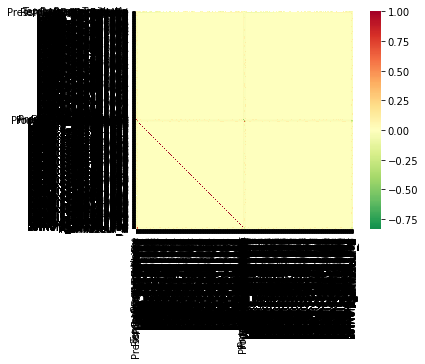

In [40]:
sn.heatmap(MatriceR, annot=False, center=0,xticklabels=True, yticklabels=True, square=True, cmap="RdYlGn_r")
plt.show()